## Zhengxu Wang 
zhengxu@bu.edu  
cs505 hw4

Programming Assignment 4: 

The files are zipped and uploaded in Piazza Resource .

**Part 1: Twitter Sentiment Classification with sklearn**

The file: sentiment-train.csv contains 60k tweets annotated by their sentiments (0: negative, 1: positive), which is a sample
of a very large sentiment corpus that has been weakly annotated based on the emojis contained in the tweets. File sentiment-test.csv contains the testing data organized in the same format as the training data file.

**Task 1 & 2:**
Using [sklearn](https://scikit-learn.org/stable/index.html) (you could search for the relevant functions to see how to use them in your code), 

1. Train a Multinomial Naive Bayes classifier (with default parameters) to predict sentiment on the
training data, featurizing the data using CountVectorizer (also in sklearn). Use the default parameters of CountVectorizer
and max features = 1000 (to limit the number of bag-of-word features to only the top 1k words based on frequency across
the corpus). You should learn more about CountVectorizer parameters and usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Report the accuracy of the trained
classifier on the test set. 

2. Use CountVectorizer with binary counts (set binary flag = True), with other parameters same as before. Using
these features, train MultinomialNB classifier with default parameters and report the accuracy of the trained classifier
on the test set. Does using binary counts as features improve the classification accuracy?

**Hint:** we strongly recommend to use [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) for reading .csv files and manipulating them in this assignment. 

In [106]:
import pandas as pd
train_df = pd.read_csv('./sentiment-train.csv')
test_df = pd.read_csv('./sentiment-test.csv')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [4]:
def constructTokenCountMatrix(corpus, target):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    vectorizer.fit(corpus)
    countMat = vectorizer.transform(target)
    return countMat

In [8]:
def trainMultinomialNaiveBayes(x, y):
    clf = MultinomialNB()
    clf.fit(x,y)
    return clf

In [6]:
xcountMatTrain = constructTokenCountMatrix(train_df['text'],train_df['text'])
xcountMatTest = constructTokenCountMatrix(train_df['text'],test_df['text'])

In [9]:
mnbModel = trainMultinomialNaiveBayes(xcountMatTrain,train_df['sentiment'])

In [10]:
mnbModel.score(xcountMatTest,test_df['sentiment'])

0.7827298050139275

Task2

In [11]:
def constructTokenCountMatrix_Binary(corpus, target):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000,binary=True)
    vectorizer.fit(corpus)
    countMat = vectorizer.transform(target)
    return countMat

In [12]:
xcountMatTrain_Binary = constructTokenCountMatrix_Binary(train_df['text'],train_df['text'])
xcountMatTest_Binary = constructTokenCountMatrix_Binary(train_df['text'],test_df['text'])

In [13]:
mnbModel_Binary = trainMultinomialNaiveBayes(xcountMatTrain_Binary,train_df['sentiment'])
mnbModel_Binary.score(xcountMatTest_Binary,test_df['sentiment'])

0.7743732590529248

It didn't improve when using binary counts as features.

**Tasks 3 & 4:**  
3. Using sklearn, train a logistic regression classifier on your training data, using CountVectorizer to featurize your
data (with the same parameters as in task 1). Report the accuracy of the trained classifier on the test set.

4. Train a logistic regression classifier as before, using binary CountVectorizer to featurize your data. Report the
accuracy of the trained classifier on the test set.

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(xcountMatTrain,train_df['sentiment'])

In [18]:
logreg.score(xcountMatTest,test_df['sentiment'])

0.766016713091922

Task4

In [19]:
logreg_binary = LogisticRegression(random_state=0).fit(xcountMatTrain_Binary,train_df['sentiment'])

In [20]:
logreg_binary.score(xcountMatTest_Binary,test_df['sentiment'])

0.7688022284122563

It is improved when using binary counts as features.

**Task 5:**  
After performing the above experiments, which feature extractor and statistical model combination is good for your
dataset? Note that this step is called model selection. Read online about the following terminology “model selection”
and “development set” a.k.a. “validation set” and describe if it is okay to do model selection on the test set.

**Your answer here:**

Through the above experiments, in the binary classification problem, the Naive Bayes probability-based model has better performance than the linear model of logistic regression. In nonlinear datasets such as natural language, nonlinear models perform better. In the process of data processing, the binary method will have an impact on the results. In the naive Bayesian model, due to the binary method, the probability calculated by the model is sparse, so the data weight is sparse and the accuracy is reduced; in the logistic regression model, let the linear model better finds the classification and improves the accuracy.

In model selection, k-fold validation is often required to exclude the particularity of some data. After k-fold validation for a single model, the average was selected to compare with other models.

The validation set assists the model in automatically adjusting the parameters during the training process, and is tested on the validation set after each round of training, so as to confirm that the gradient descent direction is correct and the accuracy rate is gradually improved. Usually a subset of train set.

It is not enough to select a model from the effect on the test set alone, it is necessary to analyze the data and the prediction target, and the inference of the model.



**Task 6 & 7:**  
6. Conduct 10-fold cross validation experiments on your training data: training a Multinomial NB classifier
with CountVectorizer and different max features (= 1000, 2000, 3000, or 4000) with and without binary counts.
Report the average accuracies of these different max features and binary/not binary across folds.

7. Select the combination of max features value and binary/not binary count choice that has the highest average
accuracy in your cross-validation experiments and train a Multinomial NB classifier on your whole training data
using this parameter to featurize your data. Report the accuracy of this trained classifier on the test set.

**Hint:** Consider Stratified K-Folds for task 6.

In [42]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

In [43]:
def trainMultinomialNaiveBayes(x, y):
    clf = MultinomialNB()
    clf.fit(x,y)
    return clf

In [44]:
def constructTokenCountMatrix(corpus, target, features, binary):
    vectorizer = CountVectorizer(stop_words='english', max_features=features,binary=binary)
    vectorizer.fit(corpus)
    countMat = vectorizer.transform(target)
    return countMat

In [46]:
for binary in [True,False]:
    for features in [1000,2000,3000,4000]:
        avg = 0
        xcountMatTrain = constructTokenCountMatrix(train_df['text'],train_df['text'],features,binary)
        for train_index, valid_index in kf.split(xcountMatTrain,train_df['sentiment']):
            X_train, X_valid = xcountMatTrain[train_index], xcountMatTrain[valid_index]
            Y_train, Y_valid = train_df['sentiment'][train_index], train_df['sentiment'][valid_index]
            
            mnbModel = trainMultinomialNaiveBayes(X_train,Y_train)
            avg += mnbModel.score(X_valid,Y_valid)
        print("binary: " + str(binary) + "  features: " + str(features) + "   Average: " + str(avg/10))

binary: True  features: 1000   Average: 0.71885
binary: True  features: 2000   Average: 0.7305166666666666
binary: True  features: 3000   Average: 0.7344833333333333
binary: True  features: 4000   Average: 0.7362333333333334
binary: False  features: 1000   Average: 0.71875
binary: False  features: 2000   Average: 0.73075
binary: False  features: 3000   Average: 0.7338833333333333
binary: False  features: 4000   Average: 0.7353666666666667


The best model is set binary = True, features = 4000

Task7

In [47]:
xcountMatTrain = constructTokenCountMatrix(train_df['text'],train_df['text'],4000,True)
xcountMatTest = constructTokenCountMatrix(train_df['text'],test_df['text'],4000,True)

mnbModel = trainMultinomialNaiveBayes(xcountMatTrain,train_df['sentiment'])
mnbModel.score(xcountMatTest,test_df['sentiment'])

0.7715877437325905

**Task 8 & 9 & 10:**

8. Use [gensim](https://radimrehurek.com/gensim/models/word2vec.html) library to learn 300-dimensional word2vec representations from the tokenized tweets (you can use
Spacy for tokenizing tweets) in your training data (you can use default parameters).
9. Given the learned word2vec representations, construct a vector representation of each tweet as the average of all
the word vectors in the tweet. Ignore words that do not have vector representations – since by default gensim
word2vec model only learns vector representations for words that appear at least 5 times across the train set.
10. Train a logistic regression classifier using the above vector representation of tweets as your features. Report
the accuracy of the trained classifier on the test set. Does dense feature representation improve the accuracy of
your logistic regression classifier?

In [51]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
for i in range(len(train_df)):
  train_df['text'][i] = re.sub(r'[\[].*?[\]]', '', train_df['text'][i])
  
  sentences = []
  docParagraph = nlp(train_df['text'][i])
  assert docParagraph.has_annotation("SENT_START")
  for sent in docParagraph.sents:
    tokens = []
    docSent = nlp(sent.text)
    for token in docSent:
      tokens.append(token.lemma_.lower())
    sentences.append(tokens)
  train_df['text'][i] = sentences

/var/folders/dq/nv7gkq6n28xbx7mghy5lgs300000gp/T/ipykernel_38569/2831797689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][i] = re.sub(r'[\[].*?[\]]', '', train_df['text'][i])
/var/folders/dq/nv7gkq6n28xbx7mghy5lgs300000gp/T/ipykernel_38569/2831797689.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][i] = sentences


In [66]:
# Using space to segment word in each sentence
allTweets = []
for i in range(len(train_df['text'])):
    sentence = []
    for j in range(len(train_df['text'][i])):
        for token in train_df['text'][i][j]:
            if token.isalpha() == True:
                sentence.append(token)
    allTweets.append(' '.join(sentence))

In [67]:
len(allTweets)

60000

In [68]:
allTweets[:10]

['i love u guy r the good',
 'i m meet up with one of my bestie tonight can not wait girl talk',
 'thank for the twitter add sunisa i get to meet you once at a hin show here in the dc area and you be a sweetheart',
 'be sick can be really cheap when it hurt too much to eat real food plus your friend make you soup',
 'he have that effect on everyone',
 'you can tell he that i just burst out laugh really loud because of that thank for make i come out of my sulk',
 'thans for your response ihad already find this answer',
 'i be so jealous hope you have a great time in vegas how do you like the acm love your show',
 'ah congrat mr fletcher for finally join twitter',
 'i respond stupid cat be help i type forgive error']

In [69]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=allTweets,vector_size=300)

In [93]:
# Turn to sentence vec
import numpy as np
def build_sentence_vector(sentence,size,w2v_model):
    sen_vec=np.zeros(size).reshape(size)
    count=0
    for word in sentence:
        try:
            sen_vec+=w2v_model.wv[word].reshape(size)
            count+=1
        except KeyError:
            continue
    if count!=0:
        sen_vec/=count
    return sen_vec

In [94]:
sent_vec_All = []
for i in range(len(allTweets)):
    sent_vec_All.append(build_sentence_vector(allTweets[i].split(' '), 300, model))

In [95]:
model.wv['i'].shape

(300,)

In [98]:
sent_vec_All[0].shape

(300,)

Task10

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(sent_vec_All,train_df['sentiment'])

/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
for i in range(len(test_df)):
  test_df['text'][i] = re.sub(r'[\[].*?[\]]', '', test_df['text'][i])
  
  sentences = []
  docParagraph = nlp(test_df['text'][i])
  assert docParagraph.has_annotation("SENT_START")
  for sent in docParagraph.sents:
    tokens = []
    docSent = nlp(sent.text)
    for token in docSent:
      tokens.append(token.lemma_.lower())
    sentences.append(tokens)
  test_df['text'][i] = sentences

# Using space to segment word in each sentence
allTweets_test = []
for i in range(len(test_df['text'])):
    sentence = []
    for j in range(len(test_df['text'][i])):
        for token in test_df['text'][i][j]:
            if token.isalpha() == True:
                sentence.append(token)
    allTweets_test.append(' '.join(sentence))

sent_vec_Test = []
for i in range(len(allTweets_test)):
    sent_vec_Test.append(build_sentence_vector(allTweets_test[i].split(' '), 300, model))

/var/folders/dq/nv7gkq6n28xbx7mghy5lgs300000gp/T/ipykernel_38569/868469349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['text'][i] = re.sub(r'[\[].*?[\]]', '', test_df['text'][i])
/var/folders/dq/nv7gkq6n28xbx7mghy5lgs300000gp/T/ipykernel_38569/868469349.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['text'][i] = sentences


In [105]:
logreg.score(sent_vec_Test,test_df['sentiment'])

0.5013927576601671

Above's accuracy is after using lemma and remove punctuation

In [142]:
def getsentVec(df):
    nlp = spacy.load("en_core_web_sm")
    for i in range(len(df)):        
        sentences = []
        docParagraph = nlp(df['text'][i])
        assert docParagraph.has_annotation("SENT_START")
        for sent in docParagraph.sents:
            tokens = []
            docSent = nlp(sent.text)
            for token in docSent:
                tokens.append(token)
            sentences.append(tokens)
        df['text'][i] = sentences



    # Using space to segment word in each sentence
    allTweets_test = []
    for i in range(len(df['text'])):
        sentence = []
        for j in range(len(df['text'][i])):
            for token in df['text'][i][j]:
                sentence.append(token.text)
        allTweets_test.append(' '.join(sentence))

    return allTweets_test

In [143]:
tweet_Train = getsentVec(train_df)

In [144]:
len(tweet_Train)

60000

In [145]:
tweet_Test = getsentVec(test_df)

In [147]:
len(tweet_Test)

359

In [148]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=tweet_Train,vector_size=300)
sent_vec_Test = []
for i in range(len(tweet_Test)):
    sent_vec_Test.append(build_sentence_vector(tweet_Test[i].split(' '), 300, model))


In [153]:
len(sent_vec_Test)

359

In [152]:
sent_vec_Test[0].shape

(300,)

In [154]:
sent_vec_Train = []
for i in range(len(tweet_Train)):
    sent_vec_Train.append(build_sentence_vector(tweet_Train[i].split(' '), 300, model))

In [155]:
len(sent_vec_Train)

60000

In [156]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(sent_vec_Train,train_df['sentiment'])
logreg.score(sent_vec_Test,test_df['sentiment'])

/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5710306406685237

Above is the result without lemma and remove puctuation.

It is not enhance the result of accuracy. LR can do better in sparse features representation.

**Part 2: PCA Analysis of Shakepear's Plays.**

The file: will play text.csv contains lines from William Shakespeare’s plays. The second column of the file contains the name of
the play, while the fifth and the sixth contain the name of the character who spoke and what they spoke, respectively. Tokenize
and lower case each line in will play text.csv using spacy. The file vocab.txt lists the words in the vocabulary. play_categories.csv stores the categories of the Shakepear's plays.

Task 11 & 12 & 13:
11. Create a term-document matrix where each row represents a word in the vocabulary and each column represents
a play. Each entry in this matrix represents the number of times a particular word (defined by the row) occurs in a
particular play (defined by the column). Use CountVectorizer in sklearn to create the matrix, using the file vocab.txt as
input for the vocabulary parameter. From your term-document matrix, use PCA in sklearn to create a 2-dimensional
representation of each play. Visualize these representations to see which plays are most similar to each other. Include the
visualization in your answer sheet. You can follow the tutorial [here](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/) to create the visualization (look at the "PCA" part).

12. What plays are similar to each other? Do they match the grouping of Shakespeare’s plays into comedies, histories,
and tragedies here?

  **Your answer here:**

13. Create another term-document matrix where each row represents a word in the vocabulary and each column
represents a play, but with TFIDF counts (using TFIDFVectorizer in sklearn and vocab.txt for vocabulary). Use PCA
again on these TFIDF term-document matrix and visualize the plays. Include the visualization in your answer sheet.

**Hints:** the PCA function in sklearn doesn't work for sparse inputs, try 'TruncatedSVD' instead. 



In [4]:
import pandas as pd
play_genres_df = pd.read_csv('play_genres.csv')


In [5]:
with open('./vocab.txt') as f:
    vocab = f.readlines()

In [6]:
for i in range(len(vocab)):
    vocab[i] = vocab[i].rstrip('\n')

In [7]:
vocab[:10]

['disliken',
 'tribe',
 'success',
 'mood',
 'pipes',
 'friday',
 'scaring',
 'lovers',
 'hue',
 'umpire']

In [8]:
with open('./will_play_text.csv') as f:
    will_play_text = f.readlines()

In [9]:
playList = []
roleList = []
sentenceList = []
for i in range(len(will_play_text)):
    playList.append(will_play_text[i].split(';')[1])
    roleList.append(will_play_text[i].split(';')[4])
    sentenceList.append(will_play_text[i].split(';')[5].rstrip('\n'))

In [239]:
nlp = spacy.load("en_core_web_sm")
for i in range(len(sentenceList)):  
    tokens = []
    doc = nlp(sentenceList[i])
    for token in doc:
      tokens.append(token.text.lower())
    sentenceList[i] = tokens


In [243]:
play_word = {}
for i in range(1,len(sentenceList)):
    sentence = []
    for word in sentenceList[i]:
        if word in vocab:
            sentence.append(word)
    if playList[i] not in play_word.keys():
        play_word[playList[i]] = []
    else:
        play_word[playList[i]] += sentence

In [234]:
def constructTokenCountMatrix(corpus, target):
    vectorizer = CountVectorizer(max_features=1000)
    vectorizer.fit(corpus)
    countMat = vectorizer.transform(target)
    return countMat

In [219]:
contMat = constructTokenCountMatrix(vocab, list(play_word.values()))

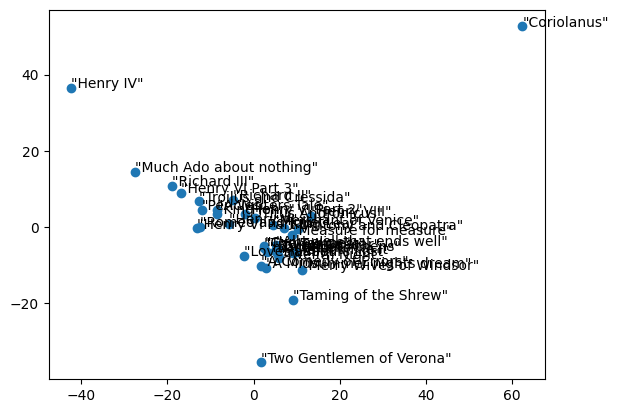

In [222]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(contMat.toarray())
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(play_word.keys()):
	pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

I know I have some redundant processes above. I used Spacy segment into tokens, it is not necessary check it is in vocab or not. And also used the sparse matrix but not svd matrix. So I changed these to the graph below.

In [247]:
playList = []
roleList = []
sentenceList = []
for i in range(1,len(will_play_text)):
    playList.append(will_play_text[i].split(';')[1])
    roleList.append(will_play_text[i].split(';')[4])
    sentenceList.append(will_play_text[i].split(';')[5].rstrip('\n'))

In [248]:
play_word = {}
for i in range(len(sentenceList)):
    if playList[i] not in play_word.keys():
        play_word[playList[i]] = ''
        play_word[playList[i]] += sentenceList[i]
    else:
        play_word[playList[i]] += sentenceList[i]

In [256]:
from sklearn.decomposition import TruncatedSVD

def constructTokenCountMatrix(corpus, target):
    vectorizer = CountVectorizer()
    vectorizer.fit(corpus)
    countMat = vectorizer.transform(target)
    svd = TruncatedSVD()
    svd.fit(countMat)
    mat = svd.fit_transform(countMat)
    return mat

In [257]:
contMat = constructTokenCountMatrix(vocab, list(play_word.values()))

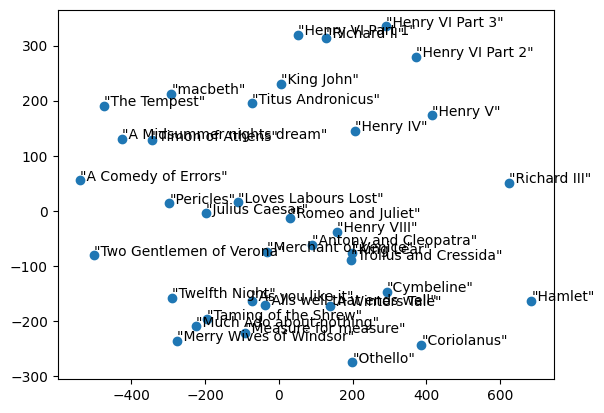

In [258]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(contMat)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(play_word.keys()):
	pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Task12

According to the graph and genres, can find the comedies like 'Merry Wives of Windsor' and 'Much Ado about nothing' are closed. And histories like 'Henry VI Part 1' and 'Henry VI Part 2' are closed. They forms a few clusters.

In [262]:
play_genres_df

,play,genre
0,A Comedy of Errors,comedies
1,A Midsummer nights dream,comedies
2,A Winters Tale,comedies
3,Alls well that ends well,comedies
4,As you like it,comedies
5,Loves Labours Lost,comedies
6,Measure for measure,comedies
7,Merchant of Venice,comedies
8,Merry Wives of Windsor,comedies
9,Much Ado about nothing,comedies


Task 13  
Create another term-document matrix where each row represents a word in the vocabulary and each column
represents a play, but with TFIDF counts (using TFIDFVectorizer in sklearn and vocab.txt for vocabulary). Use PCA
again on these TFIDF term-document matrix and visualize the plays. Include the visualization in your answer sheet.

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Tfidf(corpus, target):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(corpus)
    countMat = vectorizer.fit_transform(target)
    svd = TruncatedSVD()
    svd.fit(countMat)
    mat = svd.fit_transform(countMat)
    return mat

In [264]:
contMat = Tfidf(vocab, list(play_word.values()))

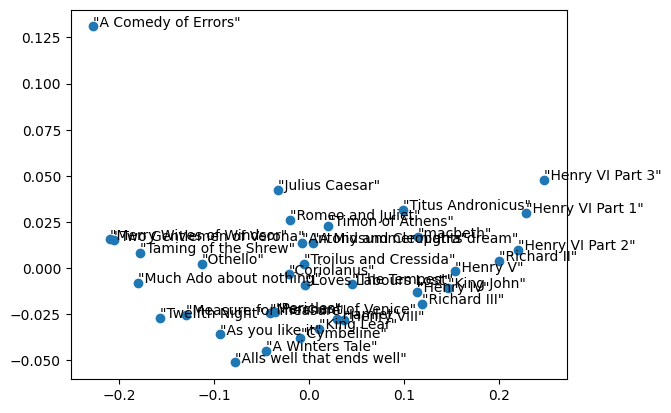

In [265]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(contMat)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(play_word.keys()):
	pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Task 14 & 15:**  
14. Create a word-word matrix where each row (and each column) represents a word in the vocabulary (vocab.txt).
Each entry in this matrix represents the number of times a particular word (defined by the row) co-occurs with another
word (defined by the column) in a sentence (i.e., line in will play text.csv). Using the row word vectors, create a representation
of a play as the average of all the word vectors in the play. Use these vector representations of plays to compute
average pairwise cosine-similarity between plays that are comedies (do not include self-similarities). You can use the
grouping of plays in here.

15. Using vector representations of plays computed in task 14, compute average pairwise cosine-similarity between
plays that are histories, and between plays that are tragedies (do not include self-similarities).

Hint: 
[How to calculate a word-word-co-occurence-matrix with sklearn](https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn).

In [15]:
sentenceList[10:20]

['"Nor more shall trenching war channel her fields,"',
 '"Nor bruise her flowerets with the armed hoofs"',
 '"Of hostile paces: those opposed eyes,"',
 '"Which, like the meteors of a troubled heaven,"',
 '"All of one nature, of one substance bred,"',
 '"Did lately meet in the intestine shock"',
 '"And furious close of civil butchery"',
 '"Shall now, in mutual well-beseeming ranks,"',
 '"March all one way and be no more opposed"',
 '"Against acquaintance, kindred and allies:"']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def getVecMat(vocab, sentences):
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), vocabulary = vocab) 
    co_occurrences = bigram_vectorizer.fit_transform(sentences)
    # print('Printing sparse matrix:', co_occurrences)
    # print('Printing dense matrix', co_occurrences.todense().shape)
    sum_occ = np.sum(co_occurrences.todense(),axis=0)
    # print('Sum of word-word occurrences:', sum_occ.shape)
    return sum_occ
# print('Pretty printig of co_occurrences count:', zip(bigram_vectorizer.get_feature_names(),np.array(sum_occ)[0].tolist()))

In [20]:
import spacy
play_word = {}
nlp = spacy.load("en_core_web_sm")
for i in range(len(sentenceList)):
    tokens = []
    doc = nlp(sentenceList[i])
    for token in doc:
        if token.text in vocab:
            tokens.append(token.text.lower())

    if playList[i] not in play_word.keys():
        play_word[playList[i]] = []
        play_word[playList[i]].append(' '.join(tokens))
    else:
        play_word[playList[i]].append(' '.join(tokens))

In [19]:
comidiesPlay = []
for i in range(len(play_genres_df['genre'])):
    if play_genres_df['genre'][i] == ' comedies':
        comidiesPlay.append("\"" + play_genres_df['play'][i] + "\"")
# play_genres_df

In [11]:
comidiesPlay[0:5]

['"A Comedy of Errors"',
 '"A Midsummer nights dream"',
 '"A Winters Tale"',
 '"Alls well that ends well"',
 '"As you like it"']

In [14]:
import numpy as np
from sklearn.preprocessing import normalize
def cosCompute(features1, features2):
    x1 = normalize(features1)
    x2 = normalize(features2)
    cos = np.dot(x1,x2.T)
    return 0.5*cos+0.5

In [38]:
x1 = getVecMat(vocab, play_word['"A Comedy of Errors"'])
x2 = getVecMat(vocab, play_word['"A Midsummer nights dream"'])
cosCompute(x1,x2)

/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/zhengxuwang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[0.97096051]])

In [39]:
def getAverage(comidiesPlay):
    sum = 0
    count = 0
    for i in range(len(comidiesPlay)):
        for j in range(i+1,len(comidiesPlay)):
            sum += cosCompute(getVecMat(vocab, play_word[comidiesPlay[i]]), getVecMat(vocab, play_word[comidiesPlay[j]]))
            count += 1
    return sum/count

In [ ]:
comediesAvg = getAverage(comidiesPlay)

In [43]:
print("play as word average  comedies  " + str(comediesAvg[0][0]))

play as word average  comedies  0.978189204436367


Task16

In [44]:
histPlay = []
for i in range(len(play_genres_df['genre'])):
    if play_genres_df['genre'][i] == ' histories':
        histPlay.append("\"" + play_genres_df['play'][i] + "\"")
# play_genres_df

In [ ]:
histAvg = getAverage(histPlay)

In [47]:
print("play as word average  histories  " + str(histAvg[0][0]))

play as word average  histories  0.982578374907332


In [48]:
tragedPlay = []
for i in range(len(play_genres_df['genre'])):
    if play_genres_df['genre'][i] == ' tragedies':
        tragedPlay.append("\"" + play_genres_df['play'][i] + "\"")

In [ ]:
tragedAvg = getAverage(tragedPlay)

In [51]:
print("play as word average  tragedies  " + str(tragedAvg[0][0]))

play as word average  tragedies  0.9803666781022138


**Task 16:**

16. Use gensim to learn 100-dimensional word2vec representation of the words in the play (you can use default
parameters but with min count=1 so you can learn vector representations of all the words in your data i.e., no need to
use vocab.txt in this question). Use the learned word2vec representation to construct vector representations of plays as
the average of all the word vectors in the play. Visualize these representations to see which plays are most similar to each other.

**Hint:** from now, since the inputs are no longer sparse, use the PCA function instead of the 'truncatedSVD' one.

In [86]:
from curses.ascii import isalpha
import spacy
play_word = {}
nlp = spacy.load("en_core_web_sm")
for i in range(1,len(sentenceList)):
    tokens = []
    doc = nlp(sentenceList[i])
    for token in doc:
        if token.text.isalpha():
            tokens.append(token.text.lower())

    if playList[i] not in play_word.keys():
        play_word[playList[i]] = []
        play_word[playList[i]] += tokens
    else:
        play_word[playList[i]] += tokens

In [87]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=list(play_word.values()), vector_size=100, min_count=1)

# Turn to sentence vec
import numpy as np
def build_plays_vector(sentence, size, w2v_model):
    sen_vec = np.zeros(size).reshape(size)
    count = 0
    for word in sentence:
        try:
            sen_vec += w2v_model.wv[word].reshape(size)
            count += 1
        except KeyError:
            continue
    if count != 0:
        sen_vec /= count
    return sen_vec

In [91]:
playName = []
playVec = []
for play in play_word.keys():
    playName.append(play)
    playVec.append(build_plays_vector(play_word[play], 100, model))

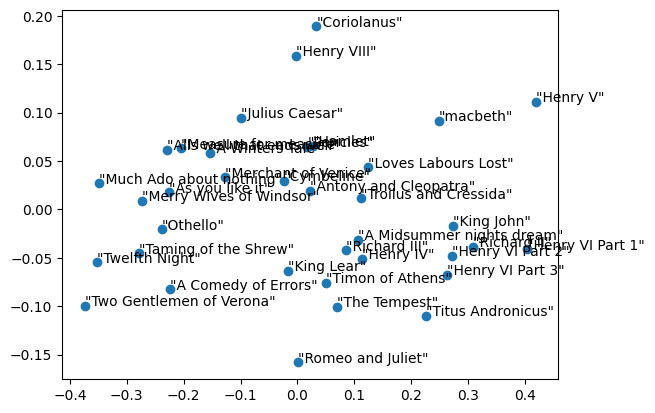

In [96]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(np.array(playVec))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(playName):
	pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Task 17:**

17. Construct the vector representation of each character as the average
of all lines’ representations that the character spoke (with the trained gensim trained representation). Visualize the characters using PCA.

In [99]:
character_word = {}
nlp = spacy.load("en_core_web_sm")
for i in range(1,len(sentenceList)):
    if roleList[i] != '':
        tokens = []
        doc = nlp(sentenceList[i])
        for token in doc:
            if token.text.isalpha():
                tokens.append(token.text.lower())

        if roleList[i] not in character_word.keys():
            character_word[playList[i]] = []
            character_word[playList[i]] += tokens
        else:
            character_word[playList[i]] += tokens

In [100]:
roleName = []
roleVec = []
for role in character_word.keys():
    roleName.append(role)
    roleVec.append(build_plays_vector(character_word[role], 100, model))

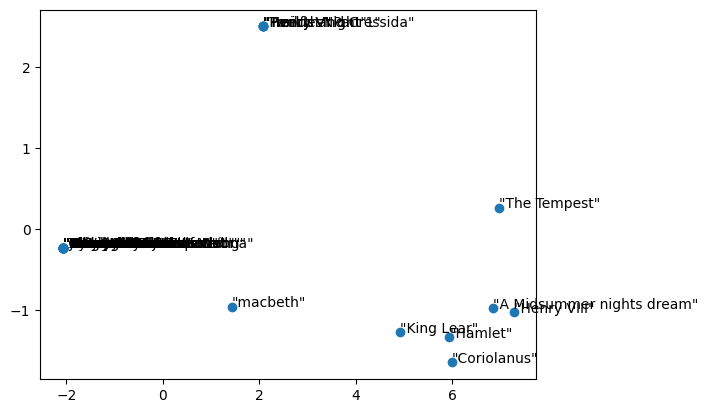

In [101]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(np.array(roleVec))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, role in enumerate(roleName):
	pyplot.annotate(role, xy=(result[i, 0], result[i, 1]))
pyplot.show()

I think it's a bit off the center with these few roles.

**Task 18:**

18. Can you find plays that are central i.e., closest to centroid to each genre? You could do so by visualizing the play representation with PCA.

In [127]:
genreDict = {}
for i in range(len(play_genres_df)):
    if play_genres_df['genre'][i] not in genreDict.keys():
        genreDict[play_genres_df['genre'][i]] = np.zeros(100).reshape(100)
        genreDict[play_genres_df['genre'][i]] += playVec[playName.index('\"' + play_genres_df['play'][i] + '\"')]
    else:
        genreDict[play_genres_df['genre'][i]] += playVec[playName.index('\"' + play_genres_df['play'][i] + '\"')]


In [133]:
countComedy = 0
countHistory = 0
countTragedy = 0
for genre in play_genres_df['genre']:
    if genre == ' comedies':
        countComedy += 1
    elif genre ==  ' histories':
        countHistory += 1
    elif genre == ' tragedies':
        countTragedy += 1

In [132]:
genreDict.keys()

dict_keys([' comedies', ' histories', ' tragedies'])

In [137]:
genreDict[' comedies'] /= countComedy
genreDict[' histories'] /= countHistory
genreDict[' tragedies'] /= countTragedy

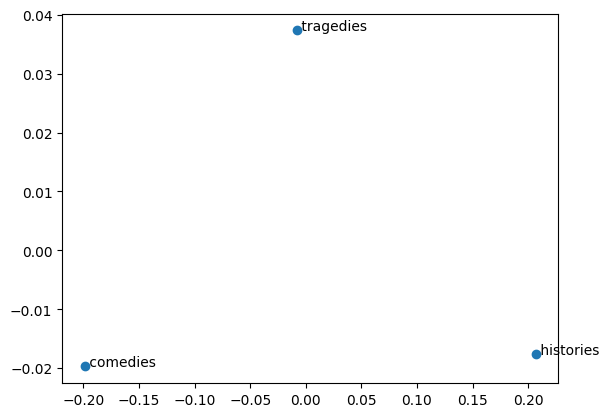

In [142]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(np.array(list(genreDict.values())))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, genre in enumerate(genreDict.keys()):
	pyplot.annotate(genre, xy=(result[i, 0], result[i, 1]))
pyplot.show()

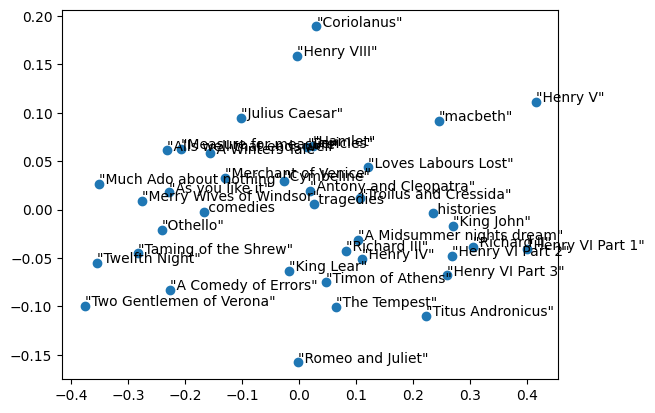

In [143]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(np.array(playVec + list(genreDict.values())))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(playName + list(genreDict.keys())):
	pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

I printed the average vector of each genres and average vector of each plays in one graph. We can find the closest play to each genre's central. Like the "King John" is closest to histories genre.